# Example of the PS-DTFE in Julia

In [1]:
using JLD, Plots

include("PS-DTFE.jl")

# Set up box
Ni = 256
L = 25.
m = (L / Ni) ^ 2
rangeX = -0.05 * L : L / (8. * Ni) : 0.05 * L

# Load data
positions_initial = load("data/positions_initial.jld", "data")
positions = load("data/positions.jld", "data")
velocities = load("data/velocities.jld", "data")

density(estimator, range) = [density([x, y], estimator) for y in range, x in range]
numberOfStreams(estimator, range) = [numberOfStreams([x, y], estimator) for y in range, x in range]

nothing

In [2]:
# Evaluate density estimator
box = [-L  L; -L L]
depth = 10

estimator = PS_DTFE(positions_initial, positions, velocities, m, depth, box)

p = [0., 0.] 

println("density: ", density(p, estimator))
println("velocity: ", v(p, estimator))
println("number of streams: ", numberOfStreams(p, estimator))

density: 376.8054437094147
simplex_indices = [2286, 7334, 7379, 15130, 17391, 17559, 18695, 18697, 18698, 19036, 19976, 31063, 34906, 35005, 35006, 35007, 35023, 36812, 38948, 52472, 56811, 56813, 56814, 58858, 59818, 81520, 84200, 95287]
velocity: [9.240223547772283 -182.06197057407758; -72.0335493878694 -157.47626126799045; -60.474397364992086 -201.50986095424116; -138.62865408956623 -44.1477038965086; -14.138369384522669 -301.9810681244974; -36.73959929910353 -286.39366328864867; 289.8822413428503 -357.03133643369085; -361.60331438499003 -211.0732124148023; -228.9301808120048 -232.9264361575794; -272.2201131180021 -316.5804686336685; -121.99349473603232 -200.93935833358216; 11.208161074960993 -183.21398691078133; 180.52646213439408 -236.49470804961538; -45.856080032833205 -282.3786059728758; -76.31262965791916 -263.7011204791138; -22.066400986263922 -293.8119250624257; 136.05348771889575 -335.52504419270235; -181.22647876713398 -125.43171772848747; 67.58881779603668 -152.41118231995

Delaunay Tesselation Field Estimator

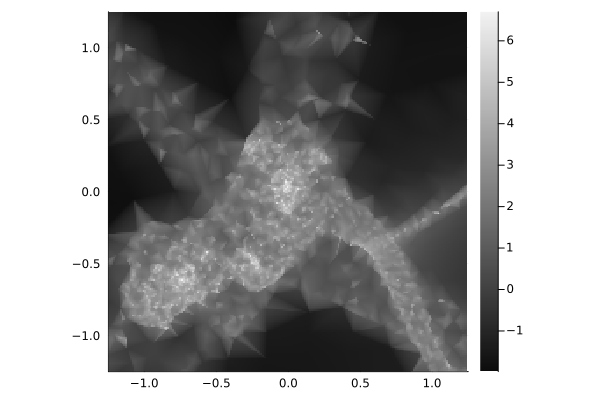

In [3]:
estimator_dtfe = PS_DTFE(positions, positions, velocities, m, depth, box)
rho_dtfe = density(estimator_dtfe, rangeX)
heatmap(rangeX, rangeX, log.(rho_dtfe), aspect_ratio=:equal, xlims=(-0.05 * L, 0.05 * L), ylims=(-0.05 * L, 0.05 * L), c=:grays)

Phase-Space Delaunay Tessellation Field Estimator

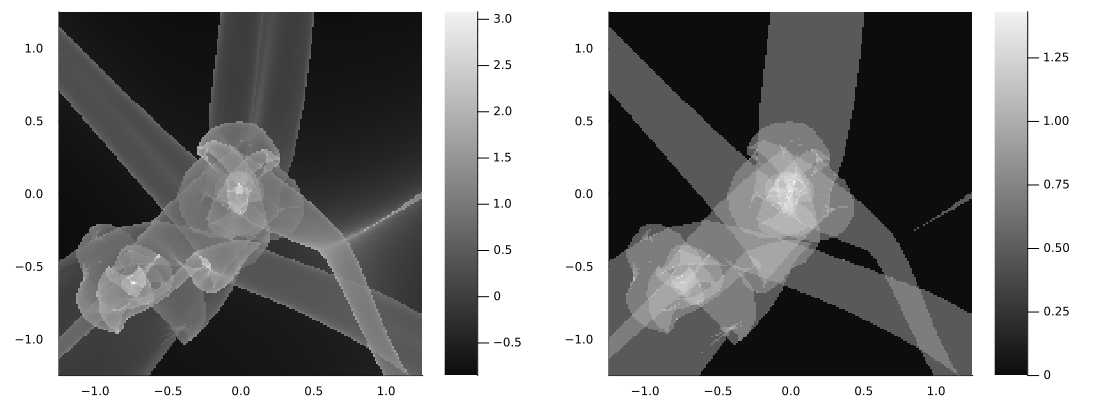

In [4]:
rho = density(estimator, rangeX)
number = numberOfStreams(estimator, rangeX)

pl1 = heatmap(rangeX, rangeX, log10.(rho), aspect_ratio=:equal, xlims=(-0.05 * L, 0.05 * L), ylims=(-0.05 * L, 0.05 * L), c=:grays)
pl2 = heatmap(rangeX, rangeX, log10.(number), aspect_ratio=:equal, xlims=(-0.05 * L, 0.05 * L), ylims=(-0.05 * L, 0.05 * L), c=:grays)

plot(pl1, pl2, layout = grid(1, 2), size=(1100, 400))